# 1 Import required libraries and read the dataset. 


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('Apps_data+(1).csv')

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [2]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10367,FG SPINNER,GAME,NaN,2,36M,10+,Free,0,Everyone,Board,"April 6, 2018",0.90,4.0.3 and up
10495,HD Themes Toyota Cruiser70,PERSONALIZATION,NaN,0,15M,100+,Free,0,Teen,Personalization,"October 3, 2016",1.0,2.3.3 and up
1181,Easy Recipes,FOOD_AND_DRINK,4.7,2707,8.9M,"100,000+",Free,0,Everyone,Food & Drink,"May 15, 2018",2.12,4.0.3 and up
4217,Talking Ginger,FAMILY,4.2,1752017,52M,"100,000,000+",Free,0,Everyone,Entertainment,"July 5, 2018",2.5.6.11,4.1 and up
7208,QUI EST CE ?,FAMILY,NaN,7,5.4M,"1,000+",Free,0,Everyone,Puzzle,"October 11, 2015",1.0,2.2 and up


In [3]:
df.shape

(10841, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   float64
 1   Reviews          7424 non-null   float64
 2   Installs         7424 non-null   float64
 3   Type             7424 non-null   float64
 4   Price            7424 non-null   float64
 5   Content Rating   7424 non-null   float64
 6   Rating_category  7424 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 435.0 KB


In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [8]:

df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# 4. Check if there are any duplicate records in the dataset? if any drop them. 

In [10]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [11]:
df.drop_duplicates(inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 5. Check the unique categories of the column 'Category', Is there any invalid category?

In [12]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
df['Category'].nunique()

34

In [14]:
df[df['Category']=='1.9'].index

Index([10472], dtype='int64')

In [15]:
df.drop(index = 10472,axis = 0,inplace = True)

In [16]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low) 


In [17]:

df['Rating'].isnull().sum()

1465

In [18]:
df.dropna(subset=['Rating'],inplace = True)

In [19]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:
df['Rating_category'] = df['Rating']

In [21]:
df['Rating_category'][df['Rating']>3.5] = 'High'

C:\Users\DELL\AppData\Local\Temp\ipykernel_1248\3547068192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating_category'][df['Rating']>3.5] = 'High'


In [22]:
df['Rating_category'][df['Rating']<=3.5] = 'Low'

In [23]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


In [24]:
df['Rating_category'].value_counts()

Rating_category
High    8012
Low      880
Name: count, dtype: int64

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [25]:
df['Rating_category'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8892, dtype: object>

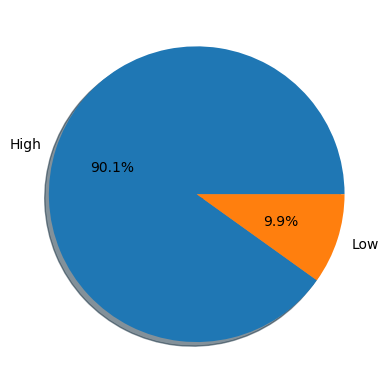

In [26]:
import matplotlib.pyplot as plt
plt.pie(df.groupby(['Rating_category'])['Rating_category'].count(),autopct = '%0.1f%%',labels = df.groupby(['Rating_category'])['Rating_category'].count().index,shadow = True);

In [ ]:
# inference
#In this pie chart clearly says, the value more than 3.5 is occupy 90% of data and the value less than 3.5 occupy 10% of data,we already converted value more than 3.5 is "high" and less than 3.5 is "low".

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [27]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors = 'coerce')

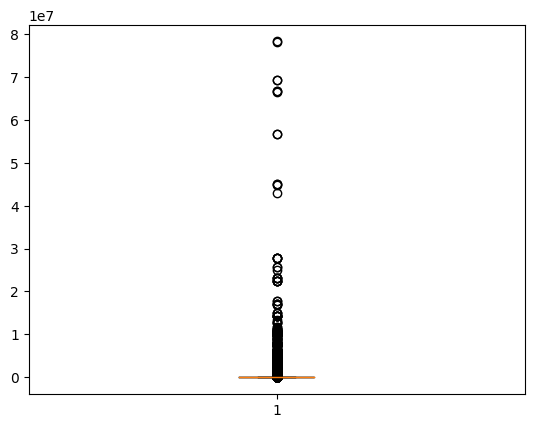

In [28]:
plt.boxplot(df['Reviews'].dropna());

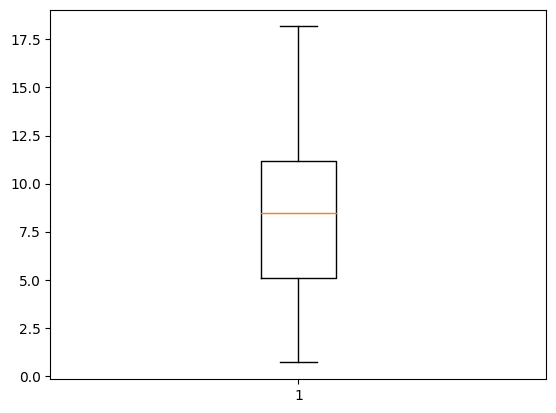

In [29]:
df['Reviews'] = np.log1p(df['Reviews'])
plt.boxplot(df['Reviews'].dropna());

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [30]:
df['Size']=df['Size'].str.replace('M','*10**6').str.replace('k','*1000')
df['Size']

0                  19*10**6
1                  14*10**6
2                 8.7*10**6
3                  25*10**6
4                 2.8*10**6
                ...        
10834             2.6*10**6
10836              53*10**6
10837             3.6*10**6
10839    Varies with device
10840              19*10**6
Name: Size, Length: 8892, dtype: object

In [31]:
df = df.drop(df[df['Size']=='Varies with device'].index)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19*10**6,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14*10**6,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.7*10**6,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25*10**6,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.8*10**6,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,619*1000,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High
10834,FR Calculator,FAMILY,4.0,2.079442,2.6*10**6,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53*10**6,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3.6*10**6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High


In [33]:
df['Size'] = df['Size'].map(eval).astype(float)
df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [34]:

df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [35]:
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']

0           10000+
1          500000+
2         5000000+
3        50000000+
4          100000+
           ...    
10833        1000+
10834         500+
10836        5000+
10837         100+
10840    10000000+
Name: Installs, Length: 7424, dtype: object

In [36]:
df['Installs'].unique()

array(['10000+', '500000+', '5000000+', '50000000+', '100000+', '50000+',
       '1000000+', '10000000+', '5000+', '100000000+', '1000+',
       '500000000+', '100+', '500+', '10+', '1000000000+', '5+', '50+',
       '1+'], dtype=object)

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type. 


In [37]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [38]:
df['Price']=df['Price'].str.replace('$','').astype(float)
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7424, dtype: float64

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [39]:

df = df.drop(columns=['Current Ver','App','Rating','Genres','Last Updated','Android Ver','Size'])
df

,Category,Reviews,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,10000+,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,500000+,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,5000000+,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281389,50000000+,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.875232,100000+,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.806662,1000+,Free,0.0,Everyone,High
10834,FAMILY,2.079442,500+,Free,0.0,Everyone,High
10836,FAMILY,3.663562,5000+,Free,0.0,Everyone,High
10837,FAMILY,1.609438,100+,Free,0.0,Everyone,High


In [40]:
num_cols = df.select_dtypes(include = np.number).columns
num_cols

Index(['Reviews', 'Price'], dtype='object')

# 13. Encode the categorical columns.

In [41]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le=LabelEncoder()
df["Rating_category"]=le.fit_transform(df["Rating_category"])


In [42]:
oe=OrdinalEncoder()
catcols=df.select_dtypes(include="object").columns
oe.fit(df[catcols])

OrdinalEncoder()

In [43]:
df[catcols]=oe.transform(df[catcols])
df

,Category,Reviews,Installs,Type,Price,Content Rating,Rating_category
0,0.0,5.075174,4.0,0.0,0.0,1.0,0
1,0.0,6.875232,15.0,0.0,0.0,1.0,0
2,0.0,11.379520,16.0,0.0,0.0,1.0,0
3,0.0,12.281389,17.0,0.0,0.0,4.0,0
4,0.0,6.875232,5.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
10833,3.0,3.806662,3.0,0.0,0.0,1.0,0
10834,11.0,2.079442,12.0,0.0,0.0,1.0,0
10836,11.0,3.663562,13.0,0.0,0.0,1.0,0
10837,11.0,1.609438,2.0,0.0,0.0,1.0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   float64
 1   Reviews          7424 non-null   float64
 2   Installs         7424 non-null   float64
 3   Type             7424 non-null   float64
 4   Price            7424 non-null   float64
 5   Content Rating   7424 non-null   float64
 6   Rating_category  7424 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 435.0 KB


# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [45]:
x=df.drop(columns="Rating_category")
x


,Category,Reviews,Installs,Type,Price,Content Rating
0,0.0,5.075174,4.0,0.0,0.0,1.0
1,0.0,6.875232,15.0,0.0,0.0,1.0
2,0.0,11.379520,16.0,0.0,0.0,1.0
3,0.0,12.281389,17.0,0.0,0.0,4.0
4,0.0,6.875232,5.0,0.0,0.0,1.0
...,...,...,...,...,...,...
10833,3.0,3.806662,3.0,0.0,0.0,1.0
10834,11.0,2.079442,12.0,0.0,0.0,1.0
10836,11.0,3.663562,13.0,0.0,0.0,1.0
10837,11.0,1.609438,2.0,0.0,0.0,1.0


In [46]:
y=df[["Rating_category"]]
y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


# 15. Split the dataset into train and test.


In [47]:
df1=df.copy()
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.25,random_state=555,stratify=df["Rating_category"])


,Category,Reviews,Installs,Type,Price,Content Rating,Rating_category
4360,14.0,5.717028,5.0,0.0,0.00,1.0,0
4770,11.0,11.054028,6.0,0.0,0.00,1.0,0
7333,11.0,5.192957,14.0,1.0,0.99,1.0,0
3332,29.0,10.431966,6.0,0.0,0.00,1.0,0
7664,11.0,3.737670,3.0,0.0,0.00,1.0,0
...,...,...,...,...,...,...,...
590,7.0,10.468972,6.0,0.0,0.00,1.0,0
10445,6.0,9.618269,6.0,0.0,0.00,1.0,0
7861,11.0,1.945910,3.0,0.0,0.00,1.0,0
10549,14.0,12.617838,17.0,0.0,0.00,1.0,0


In [ ]:
train

In [ ]:
test

# 16. Standardize the data, so that the values are within a particular range

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train)

In [ ]:
train=pd.DataFrame(ss.transform(train))
train

In [ ]:
test=pd.DataFrame(ss.transform(test))
test